In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1J05tsCBwdhEwkXygcbpKNztsXA6qErPC'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [1]:
!pip install twitterscraper
!pip install vaderSentiment
!pip install langdetect

     |████████████████████████████████| 92kB 5.1MB/s 
  Created wheel for twitterscraper: filename=twitterscraper-1.6.1-cp36-none-any.whl size=11349 sha256=3d1029722ef8268b200b5da5839e77ada369f2b10daea950ec4b14876cd09bb8
  Stored in directory: /root/.cache/pip/wheels/1a/50/a0/808fd6df0ac14c168b73874056a1ca52e4d88c0c1ecedd4e48
Successfully built twitterscraper
     |████████████████████████████████| 133kB 8.1MB/s 
     |████████████████████████████████| 983kB 7.8MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=b3d2b5f29b0929463e0dbd3c05ed6b3ddbd0eca544cb60fb1c90a965de467d6e
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [2]:
#Importing the relevent libraries
import pandas as pd 
import datetime as dt 
from twitterscraper import query_tweets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from langdetect import detect 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
begin_date = dt.date(2018,1,1)
end_date = dt.date(2020,3,26)
limit = 100000
lang = 'english'


In [4]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive/My Drive/Morgan Stanley Project/Data and Notebook/
#!cat '/gdrive/My Drive/Morgan Stanley Project/Data and Notebook/pretty_ms_tweets.json'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive/
/gdrive/.shortcut-targets-by-id/1dI67RTtEW-SJRhnNRkrF26W-uhDV3Asg/Morgan Stanley Project/Data and Notebook


In [ ]:
# tweets = query_tweets("morganstanley", begindate = begin_date, enddate = end_date, limit = limit, lang = lang)


In [ ]:
#Transforming it into a dataframe
# df = pd.DataFrame(t.__dict__ for t in tweets)
# Saving a file
# df.to_csv('TwitterData.csv')

In [5]:
#Importing twitter data
#JP Morgan and Chase
df_jp = pd.read_json('pretty_jp_tweets.json')

In [6]:
df_jp.head()

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url
0,False,[InToDeep],[],False,True,2,[],1124781148314320896,0,"[{'screen_name': 'MariaBartiromo', 'user_id': ...",0,earthcityblues,Billion..... with a B. Friends in Communist p...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-05-04 23:58:37,2019-05-04 23:58:37,1124825692389167104,/earthcityblues/status/1124825692389167106,2872566267,Noah Sender,
1,False,[],[],False,True,0,[],1124807765854228480,0,"[{'screen_name': 'Fame21Moore', 'user_id': '49...",0,shanesek1,I remember the sentiment in the last crash whe...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-05-04 23:57:37,2019-05-04 23:57:37,1124825439552151552,/shanesek1/status/1124825439552151552,1212673158,Shane Sekuloski,
2,False,[],[],False,True,1,[],1063491747156680704,0,"[{'screen_name': 'ballweg_matt', 'user_id': '7...",0,EricVonHaden1,That's an awesome view up there,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-05-04 23:56:55,2019-05-04 23:56:55,1124825263223623680,/EricVonHaden1/status/1124825263223623680,809259868125151232,Eric's📷📷📷,
3,False,[],[],False,True,0,[],1124781148314320896,0,"[{'screen_name': 'MariaBartiromo', 'user_id': ...",0,bbmanatee,It should loom...as well as that ukranian thing.,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-05-04 23:56:43,2019-05-04 23:56:43,1124825211549954048,/bbmanatee/status/1124825211549954049,85379383,Rebecca Bodden,
4,False,[],[],False,True,2,[],1124781148314320896,0,"[{'screen_name': 'MariaBartiromo', 'user_id': ...",2,Dan10768802,That’s why Biden made his fluffy comments abou...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-05-04 23:52:53,2019-05-04 23:52:53,1124824245563871232,/Dan10768802/status/1124824245563871232,1051297635057917952,🇺🇸Dan,


In [15]:
import numpy as np
import regex as re
import nltk
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
df_jp['text'] = np.vectorize(remove_pattern)(df_jp['text'], "@[\w]*: | *RT*")

In [16]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_set = set(stopwords.words("english"))
cleaned_tweets = []

for index, row in df_jp.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.text.split() if not word in stopwords_set]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))

df_jp['text'] = cleaned_tweets

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


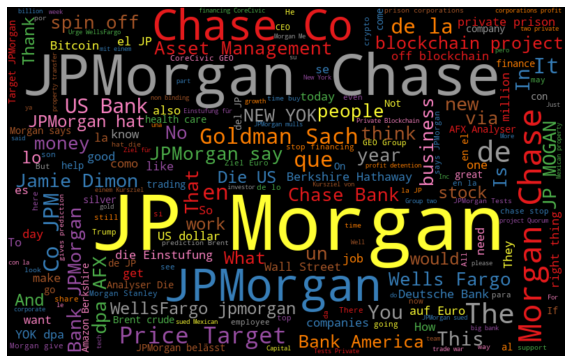

In [28]:
all_words = ' '.join([text for text in df_jp['text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, colormap="Set1",stopwords=["pic","https","twitter","com"]).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [19]:
print(df_jp['timestamp'].min())
print(df_jp['timestamp'].max())

2018-02-09 07:08:32
2020-03-25 23:55:39


In [20]:
df_jp['date'] = pd.to_datetime(df_jp['timestamp'])
df_jp = df_jp.set_index(df_jp['timestamp'])
df_jp = df_jp.sort_index()

In [21]:
# Dividing df_all on the basis of half yearly data
q1 = df_jp[:'2018-06-30']
q2 = df_jp['2018-07-01':'2018-12-31']
q3 = df_jp['2019-01-01':'2019-06-30']
q4 = df_jp['2019-07-01':'2019-12-31']
q5 = df_jp['2020-01-01':]

In [22]:
#Sentiment Analysis
#Vader Sentiment

In [23]:
analyzer = SentimentIntensityAnalyzer()

In [24]:
# year 2018 first half

In [25]:
sentiment = q1['text'].apply(lambda x: analyzer.polarity_scores(x))

In [27]:
#Inserting the sentiment into the dataframe
q1 = pd.concat([q1, sentiment.apply(pd.Series)],1)

In [ ]:
#df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [ ]:
q1['date'] = q1['timestamp'].apply(lambda x: x.date())

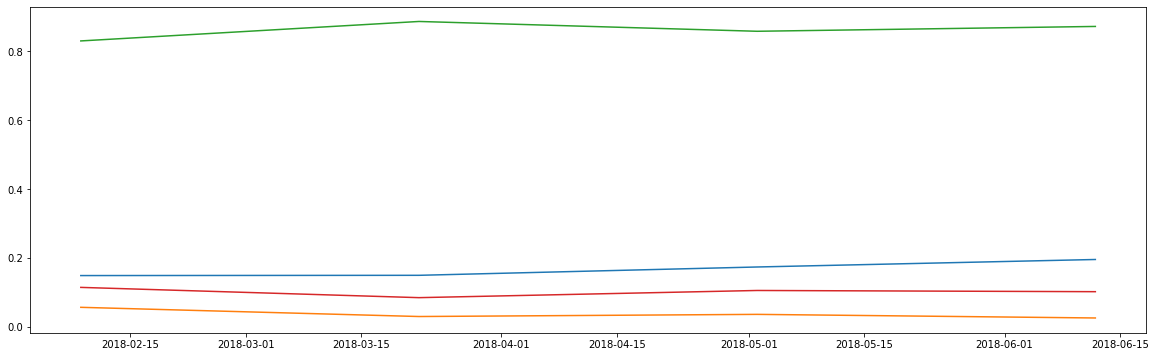

In [ ]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(q1.groupby('date').mean()['compound'].index, q1.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(q1.groupby('date').mean()['neg'].index, q1.groupby('date').mean()['neg'].values)
plt.plot(q1.groupby('date').mean()['neu'].index, q1.groupby('date').mean()['neu'].values)
plt.plot(q1.groupby('date').mean()['pos'].index, q1.groupby('date').mean()['pos'].values)

In [ ]:
# year 2018 second half

In [ ]:
sentiment = q2['text'].apply(lambda x: analyzer.polarity_scores(x))

In [ ]:
q2 = pd.concat([q2, sentiment.apply(pd.Series)],1)

In [ ]:
q2['date'] = q2['timestamp'].apply(lambda x: x.date())

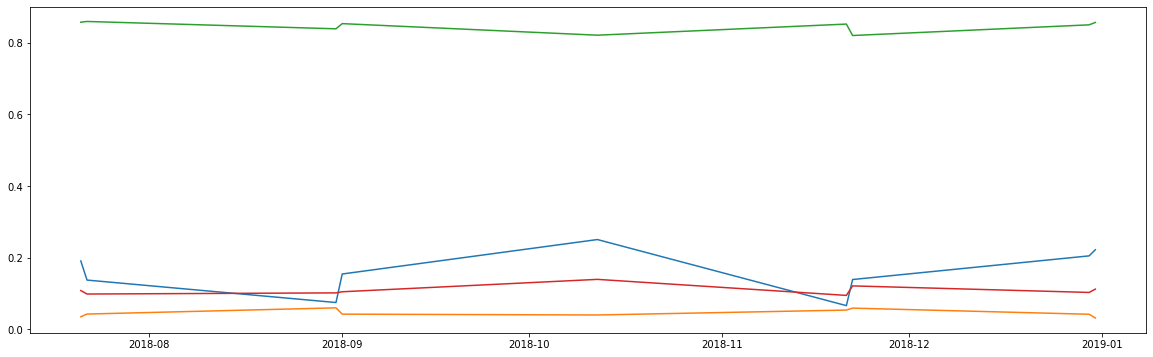

In [ ]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(q2.groupby('date').mean()['compound'].index, q2.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(q2.groupby('date').mean()['neg'].index, q2.groupby('date').mean()['neg'].values)
plt.plot(q2.groupby('date').mean()['neu'].index, q2.groupby('date').mean()['neu'].values)
plt.plot(q2.groupby('date').mean()['pos'].index, q2.groupby('date').mean()['pos'].values)

In [ ]:
# year 2019 first half

In [ ]:
sentiment = q3['text'].apply(lambda x: analyzer.polarity_scores(x))

In [ ]:
q3 = pd.concat([q3, sentiment.apply(pd.Series)],1)

In [ ]:
q3['date'] = q3['timestamp'].apply(lambda x: x.date())

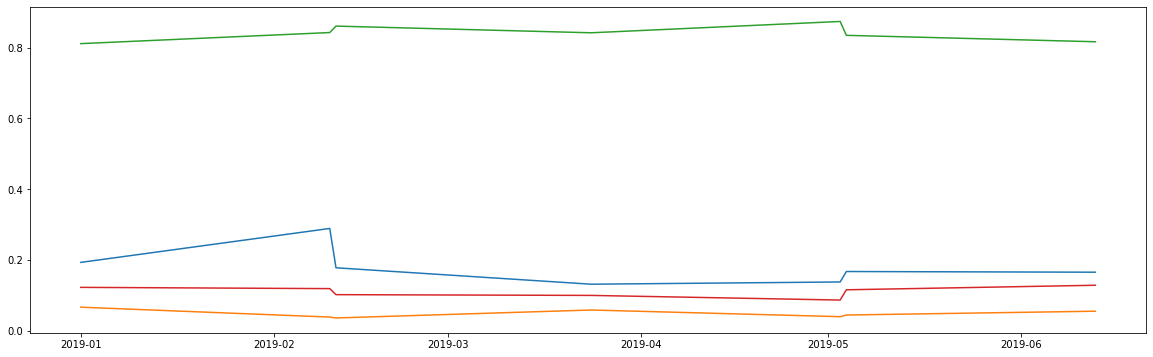

In [ ]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(q3.groupby('date').mean()['compound'].index, q3.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(q3.groupby('date').mean()['neg'].index, q3.groupby('date').mean()['neg'].values)
plt.plot(q3.groupby('date').mean()['neu'].index, q3.groupby('date').mean()['neu'].values)
plt.plot(q3.groupby('date').mean()['pos'].index, q3.groupby('date').mean()['pos'].values)

In [ ]:
# year 2019 second half

In [ ]:
sentiment = q4['text'].apply(lambda x: analyzer.polarity_scores(x))

In [ ]:
q4 = pd.concat([q4, sentiment.apply(pd.Series)],1)

In [ ]:
q4['date'] = q4['timestamp'].apply(lambda x: x.date())

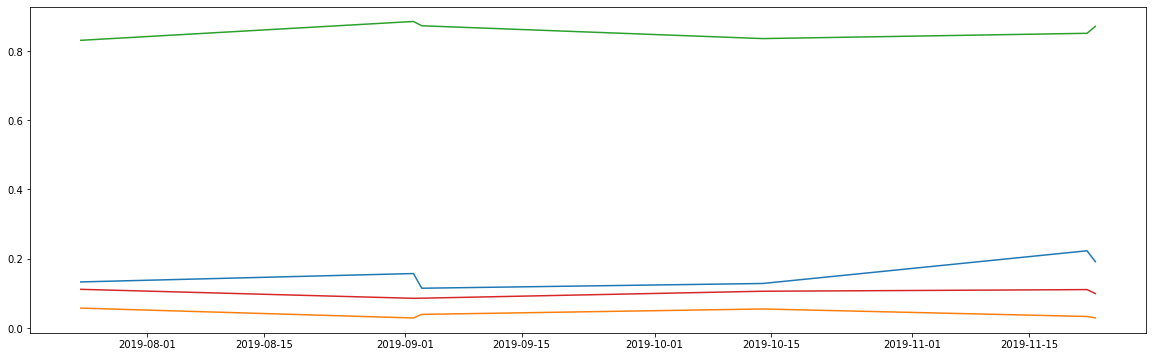

In [ ]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(q4.groupby('date').mean()['compound'].index, q4.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(q4.groupby('date').mean()['neg'].index, q4.groupby('date').mean()['neg'].values)
plt.plot(q4.groupby('date').mean()['neu'].index, q4.groupby('date').mean()['neu'].values)
plt.plot(q4.groupby('date').mean()['pos'].index, q4.groupby('date').mean()['pos'].values)

In [ ]:
# year 2020 first half

In [ ]:
sentiment = q5['text'].apply(lambda x: analyzer.polarity_scores(x))

In [ ]:
q5 = pd.concat([q5, sentiment.apply(pd.Series)],1)

In [ ]:
q5['date'] = q5['timestamp'].apply(lambda x: x.date())

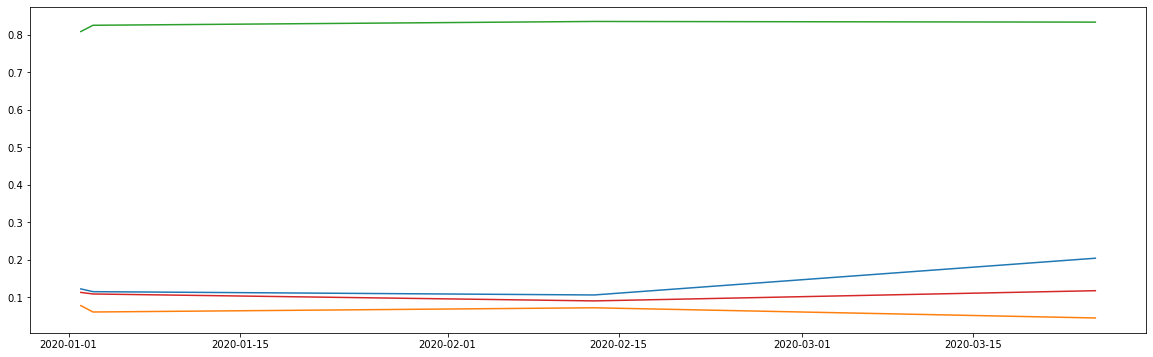

In [ ]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(q5.groupby('date').mean()['compound'].index, q5.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(q5.groupby('date').mean()['neg'].index, q5.groupby('date').mean()['neg'].values)
plt.plot(q5.groupby('date').mean()['neu'].index, q5.groupby('date').mean()['neu'].values)
plt.plot(q5.groupby('date').mean()['pos'].index, q5.groupby('date').mean()['pos'].values)

In [ ]:
# Dividing df_all on the basis of yearly data
y1 = df_jp[:'2018-12-31']
y2 = df_jp['2019-01-01':'2019-12-31']
y3 = df_jp['2020-01-01':]

In [ ]:
# Year 1 - 2018

In [ ]:
sentiment = y1['text'].apply(lambda x: analyzer.polarity_scores(x))

In [ ]:
y1 = pd.concat([y1, sentiment.apply(pd.Series)],1)

In [ ]:
y1['date'] = y1['timestamp'].apply(lambda x: x.date())

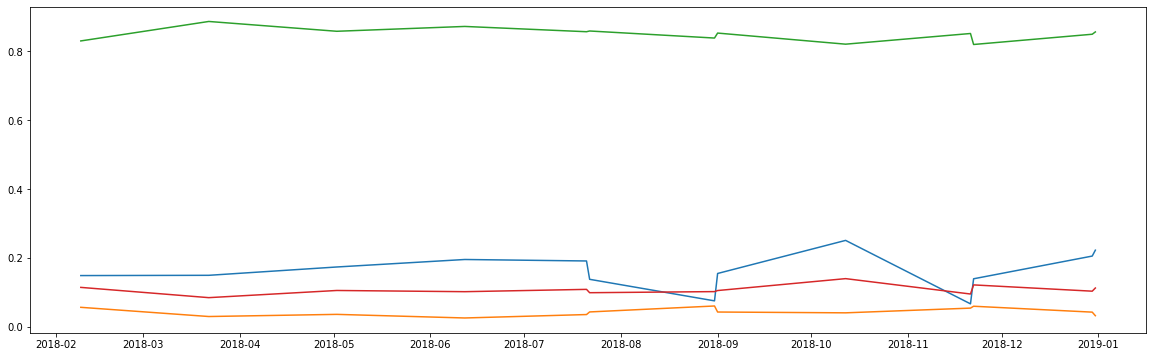

In [ ]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(y1.groupby('date').mean()['compound'].index, y1.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(y1.groupby('date').mean()['neg'].index, y1.groupby('date').mean()['neg'].values)
plt.plot(y1.groupby('date').mean()['neu'].index, y1.groupby('date').mean()['neu'].values)
plt.plot(y1.groupby('date').mean()['pos'].index, y1.groupby('date').mean()['pos'].values)

In [ ]:
# Year 2 - 2019

In [ ]:
sentiment = y2['text'].apply(lambda x: analyzer.polarity_scores(x))

In [ ]:
y2 = pd.concat([y2, sentiment.apply(pd.Series)],1)

In [ ]:
y2['date'] = y2['timestamp'].apply(lambda x: x.date())

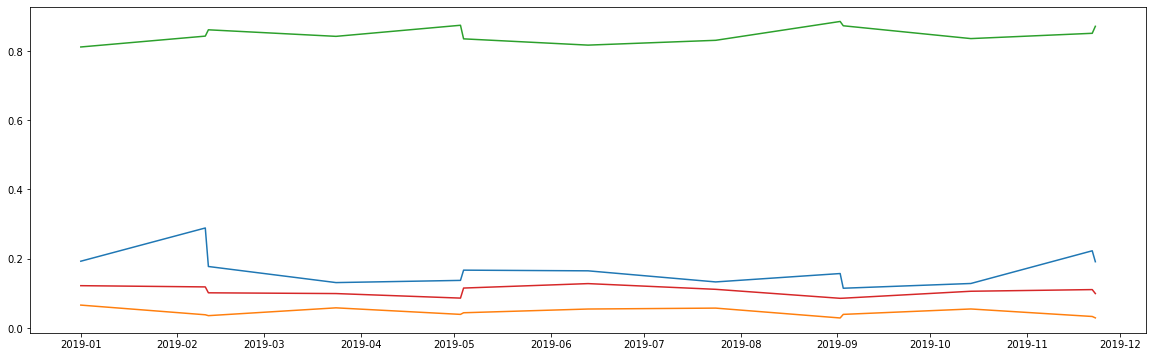

In [ ]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(y2.groupby('date').mean()['compound'].index, y2.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(y2.groupby('date').mean()['neg'].index, y2.groupby('date').mean()['neg'].values)
plt.plot(y2.groupby('date').mean()['neu'].index, y2.groupby('date').mean()['neu'].values)
plt.plot(y2.groupby('date').mean()['pos'].index, y2.groupby('date').mean()['pos'].values)

In [ ]:
# Year 3 - 2020

In [ ]:
sentiment = y3['text'].apply(lambda x: analyzer.polarity_scores(x))

In [ ]:
y3 = pd.concat([y3, sentiment.apply(pd.Series)],1)

In [ ]:
y3['date'] = y3['timestamp'].apply(lambda x: x.date())

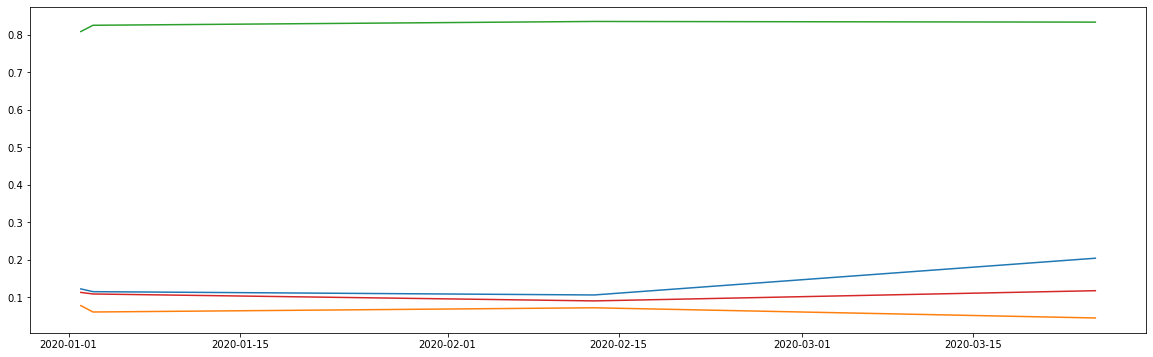

In [ ]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(y3.groupby('date').mean()['compound'].index, y3.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(y3.groupby('date').mean()['neg'].index, y3.groupby('date').mean()['neg'].values)
plt.plot(y3.groupby('date').mean()['neu'].index, y3.groupby('date').mean()['neu'].values)
plt.plot(y3.groupby('date').mean()['pos'].index, y3.groupby('date').mean()['pos'].values)